<a href="https://colab.research.google.com/github/codewithhari98/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This Program is for Linear Regression from scratch on Iris Dataset


from sklearn.datasets import load_iris
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as pyplt
from itertools import combinations,permutations
from sklearn.model_selection import train_test_split
%matplotlib widget
iris = load_iris()
#iris

parameter_arr=[]

In [ ]:
class LinearRegression() :
    #initializing the class object, L2 penalty used for L2 regularization
    def __init__( self, learning_rate, iterations,l2_penalty ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty=l2_penalty
        self.parameter_arr=[]
        
    def fit(self,X,Y):
        self.m= X.shape[0]
        self.b = 0
        self.x = X 
        self.y = Y
        costarr=self.batch_gradient_descent()
        return costarr
    
    # @symbol is for matrix multiplication
    def predict(self,X) :
        return X @ self.w
    
    def weights(self):
        return self.parameter_arr
    
    #mean square error calculated here
    def evalcost(self,X,Y):
        Y_Pred = self.predict(X) 
        cost = (1/self.m)*np.sum(np.square(Y_Pred-Y))
        return cost
    
    #Batch gradient descent with number of steps=100 and step size 32 is executed in this function
    def batch_gradient_descent(self,batchsize=32):
        self.w = np.random.uniform(-1,1,size=(2,))
        cost=np.zeros((self.iterations,1))
        
        for i in range(self.iterations):
            current_value = 0.0
            for j in range(batchsize):
                random_index = np.random.randint(0,self.m)
                xi = self.x[random_index:random_index+1]
                yi = self.y[random_index:random_index+1]
                gradient = ((np.dot(xi.T,(self.predict(xi) -yi))) + ( self.l2_penalty * self.w ) ) * (2/xi.shape[0])
                self.w = self.w - self.learning_rate*gradient
                current_value += self.evalcost(xi,yi)
            cost[i] = current_value
        self.parameter_arr.append(self.w)
        return cost

L2 Regularized Weights:  [array([0.96872272, 1.11578013])]
Before L2 Regularization:  [ 3.39384352 -0.06653533]


Model Number 1 error =  0.2004356074726021
Model Number 2 error =  1.0354554489952121
Model Number 3 error =  0.6004473678743243
Model Number 4 error =  0.8685641953418426
Model Number 5 error =  2.771002689787823
Model Number 6 error =  0.5303027160016948
Model Number 7 error =  0.1622441090271994
Model Number 8 error =  0.1601294611015592
Model Number 9 error =  0.04297873843768406
Model Number 10 error =  0.23621912358074826
Model Number 11 error =  0.15763859757556734
Model Number 12 error =  0.22109102399227504


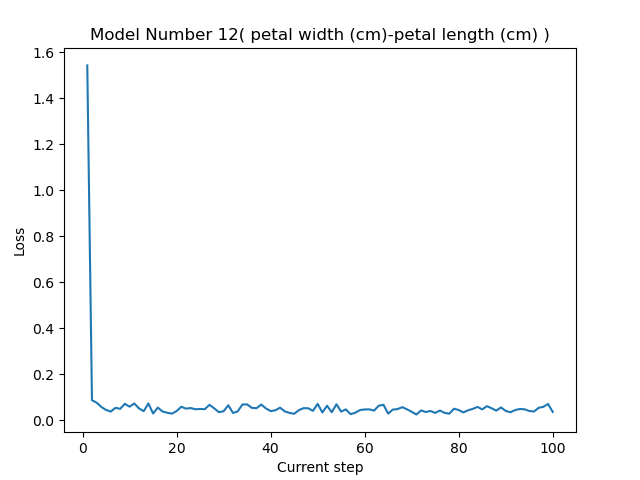

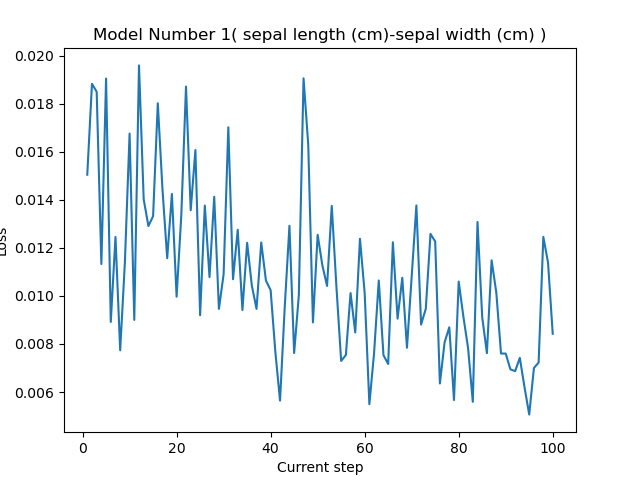

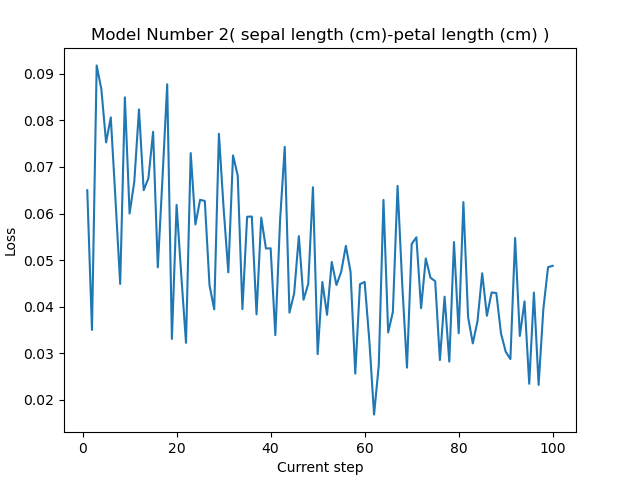

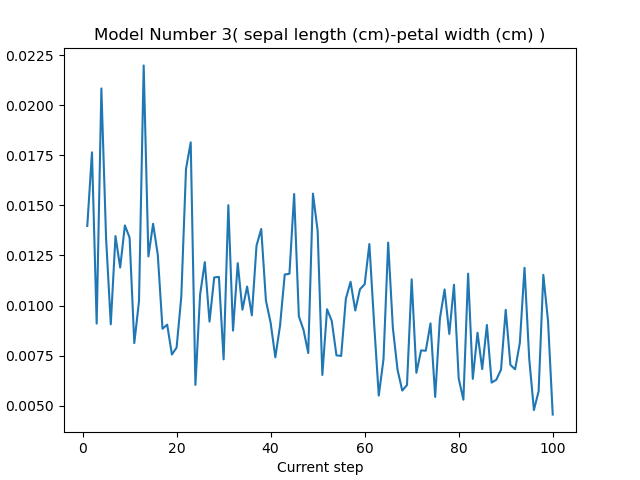

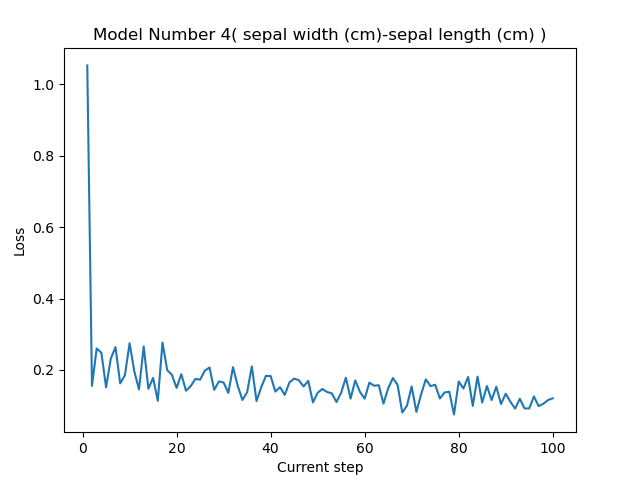

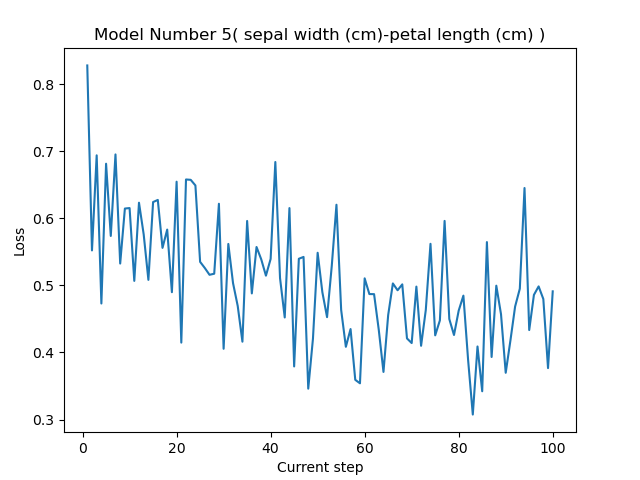

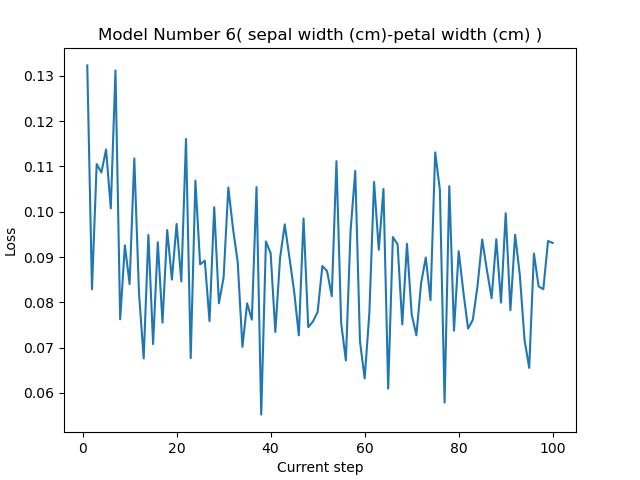

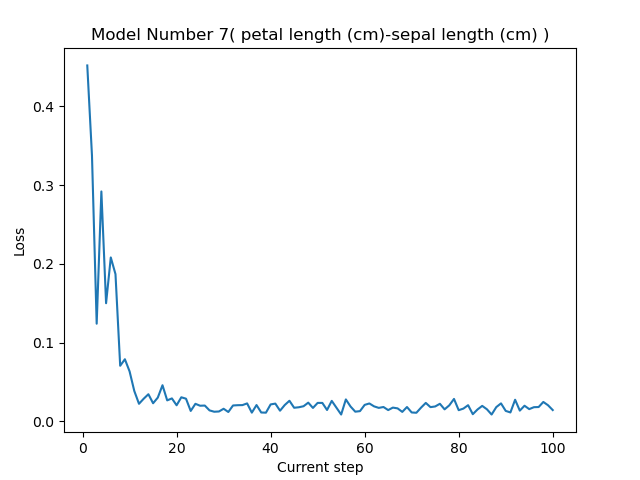

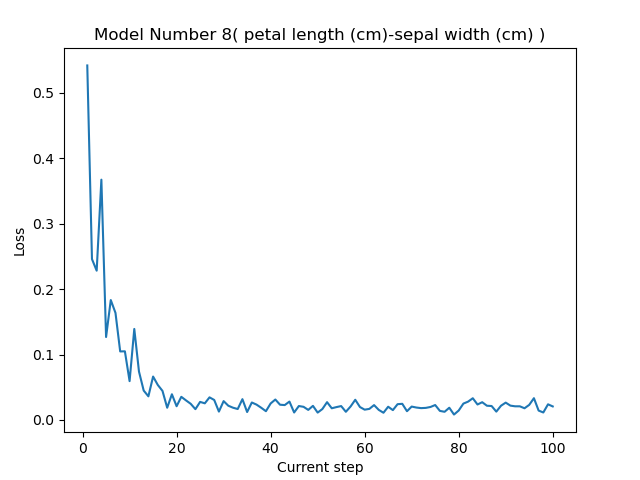

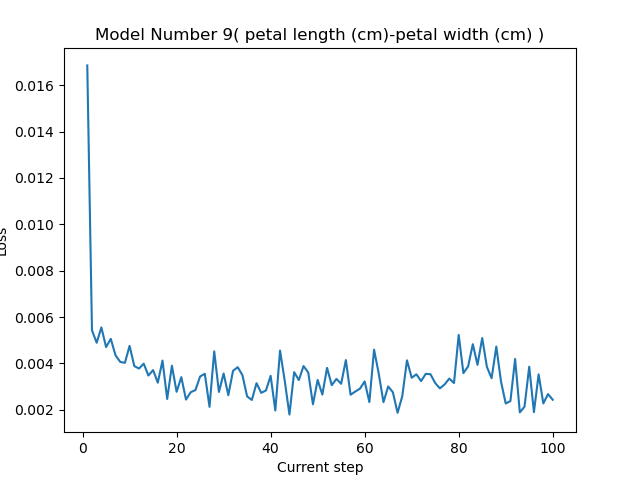

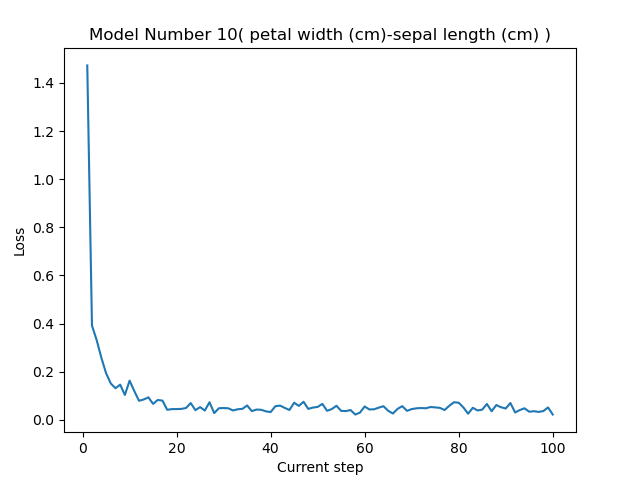

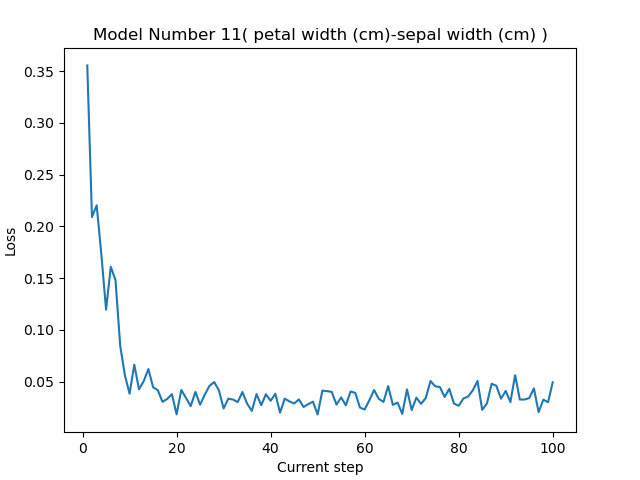

In [ ]:
def main():
    x,y=iris.data,iris.target
    features=iris.feature_names
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,test_size=0.1,stratify=y)
    
    #we create a permutation of values to extract feature names and values
    diffmodels = list(permutations(list(range(4)),2))
    model = LinearRegression(0.01,100,0)
    
    count=1
    model_num=1
    step_num=range(1,101)

    for i,z in enumerate(diffmodels):
        data = np.stack((np.ones(len(x_train)), x_train[:, z[0]]), axis=1)
        target = x_train[:, z[1]]
        cost=model.fit(data,target)
        plt.figure()
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
        plt.title('Model Number '+str(i+1)+"( "+iris.feature_names[z[0]]+'-'+iris.feature_names[z[1]]+" )")
        plt.plot(step_num,cost)
        plt.ylabel('Loss')
        plt.xlabel('Current step')
        
    weights=model.weights()
    data = np.stack((np.ones(len(x_train)), x_train[:, 2]), axis=1)
    target = x_train[:, 0]
    
    #l2penalty set as 1 to get the l2 regularized weights and to compare with old weights
    model2 = LinearRegression(0.01,100,1)
    model2.fit(data,target)
    weight1=model2.weights()
    print('L2 Regularized Weights: ', weight1)
    print('Before L2 Regularization: ',weights[7])
    print("\n")

    #Testing done here
    for i,z in enumerate(diffmodels):
        data = np.stack((np.ones(len(x_train)), x_train[:, z[0]]), axis=1)
        target = x_train[:, z[1]]
        testing_pred=data@weights[i]
        error= (1/data.shape[0])*np.sum(np.square(testing_pred-target))
        print("Model Number "+str(i+1)+" error = ",error)  
    plt.show()
    
if __name__ == "__main__" : 
      
    main()
    